# Statistics Practice

Alright, millenials - your love for avocados is legendary. So let's grab some data on avocado prices by region and use them to practice statistics!

![Avocado meme: You can't please everyone, you're not an avocado](./Avocado-cantpleaseeveryone.jpg)

## Setup

(Run these cells without changes to prep your data)

In [1]:
# Imports
import pandas as pd
import numpy as np
np.random.seed(123)

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("avocado.csv", index_col=0, parse_dates=["Date"])

In [3]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [5]:
df[['AveragePrice']].describe()

AveragePrice
count  18249.000000
mean       1.405978
std        0.402677
min        0.440000
25%        1.100000
50%        1.370000
75%        1.660000
max        3.250000

In [6]:
# Performing a group-by to get average prices by region
regions = df.groupby('region').mean()

In [7]:
regions[['AveragePrice']].describe()

AveragePrice
count     54.000000
mean       1.405955
std        0.166653
min        1.047929
25%        1.287848
50%        1.400725
75%        1.515947
max        1.818639

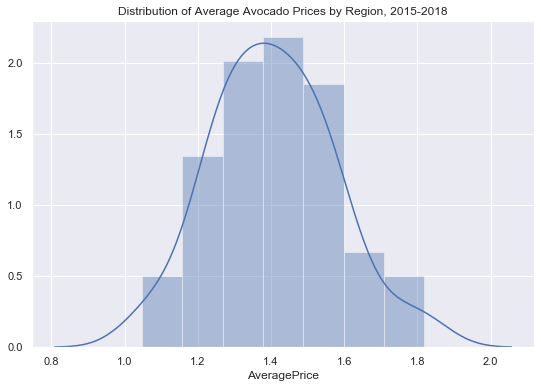

In [8]:
# Plotting the distribution 
plt.figure(figsize = (9,6))

sns.distplot(regions["AveragePrice"])

plt.title("Distribution of Average Avocado Prices by Region, 2015-2018")
plt.show()

## Statistical Distributions and Testing

### Using Z-Scores to Interpret Data

A **Z-score** measures how many standard deviations above or below the mean a data point is. It is calculated as:

$z = \frac{x - \mu}{\sigma}$

Write a function that will output a z-score, given a data point, the mean and the standard deviation:

In [9]:
# Write function here

def calc_z_score(x, mean, stdev):
    z_score = (x - mean) / stdev
    return z_score

Now let's use it! Let's say we have a new region, Narnia, and the average avocado price there is `$1.60`. How many standard deviations is that from the average?

(Here's a function you may not have used before, but might need here: [`np.std()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) )

In [15]:
# Code here

region_mean = regions["AveragePrice"].mean()
region_std = regions["AveragePrice"].std()

calc_z_score(1, region_mean, region_std)

-2.4359213019222943

In [ ]:
'''
Analysis here - what does that mean?
Our point, $1.60, is 1.16 standard deviations above the mean!

Second point, $2 : 3.56
'''

In [ ]:
'''
Further analysis - at alpha = 0.05, is Narnia's $1.60 average avocado price 
significantly greater than the mean for the other regions?

ONE-tailed test

Narnia's average price's z-score : 1.16
Critical threshold: 1.64

NOT significantly greater than the mean for other regions

What if:
significantly different than the mean for other regions:
alpha = .05 / 2 =  .025
'''

In [17]:
stats.norm.ppf((.025))

-1.9599639845400545

### Confidence Intervals

From our data on regional average avocado prices, our 95% confidence interval for the average price across regions is between 1.08 and 1.73.

What does that mean?

In [18]:
region_mean

1.4059546956211708

In [ ]:
'''
Analysis here - what does that mean?

95% confident that the true regional average avocado price is between $1.08
and $1.73
'''

## Hypothesis Testing

Okay, let's say we have two sets of regions: the Northern hemisphere, which we've been looking at so far, and the Southern hemisphere.

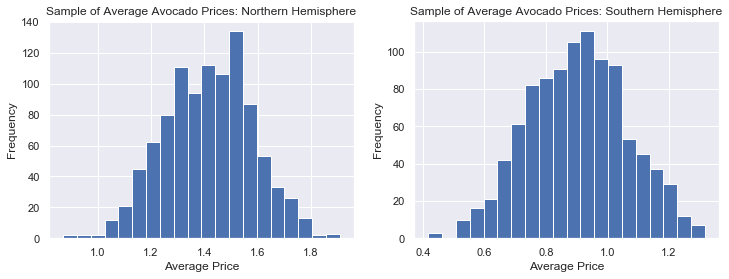

In [19]:
# Run this cell without changes

# Load the sample data from each hemisphere
northern_hem = pd.read_csv('northern_hemisphere.csv')
southern_hem = pd.read_csv('southern_hemisphere.csv')

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Average Avocado Prices: Northern Hemisphere')
ax1.set_xlabel('Average Price')
ax1.set_ylabel('Frequency')
ax1.hist(northern_hem['Average Price'], bins=20)

ax2.set_title('Sample of Average Avocado Prices: Southern Hemisphere')
ax2.set_xlabel('Average Price')
ax2.set_ylabel('Frequency')
ax2.hist(southern_hem['Average Price'], bins=20)
plt.show()

We want to know if people in the Southern hemisphere spend **a different amount** on avocados on average than those in the Northern hemisphere.

First, let's answer a few questions:

1. What **kind of test** are we doing? 
2. What are our **Null** and **Alternative** hypotheses? 
3. What would a **Type I** error look like in this context?
4. What would a **Type II** error look like in this context?

In [ ]:
'''
1) What kind of test is this?

Two-tailed test!
'''

In [ ]:
'''
2) Null hypothesis: Northern and Southern prices are the same
Northern average price = Southern average price
People in north spend the same amount than people in the south

Alternative hypothesis: Northern and Southern prices are different
Northern average price != Southern average price
People in north spend a different amount than people in the south
'''

In [ ]:
'''
3) Type I Error: reject the null hypothesis when it's true

we think they spend the different amount on avocados on average, when ACTUALLY
they spend same amounts
'''

In [ ]:
'''
4) Type II Error: fail to reject the null hypothesis when it's false

we think they spend the same amount on avocados on average, when ACTUALLY
they spend different amounts
'''

Run a statistical test on the two samples. Can you reject the null hypothesis?

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

In [23]:
# Code here

stats.ttest_ind(northern_hem, southern_hem)

Ttest_indResult(statistic=array([70.04959998]), pvalue=array([0.]))

In [ ]:
"""
Analysis here - can you reject the null hypothesis?

significance level = .05/2 = .025
p = 0.0000000

so p < significance level (alpha) so we can reject the null hypothesis

also! signifiance threshold = 1.96
test statistic = 70
so 70 > 1.96 so we can reject the null hypothesis
"""

What if we only want to know if people in the Southern hemisphere spend **less** than those in the Northern hemisphere?

In [ ]:
'''
Analysis here - what would that change?

one-tailed test now - because looking only at whether it's LESS than
don't divide alpha in half
'''

## Bayes' Theorem

For reference, from Bryan's notes:

$$
P(A | B) = \frac{P(B | A) * P(A)}{P(B)}
$$


* $P(A)$ : ***Prior probability***

* $P(B|A)$ : ***Likelihood***

* $P(B)$ : ***Evidence***

* $P(A|B)$ : ***Posterior probability***


Thus you can also write Bayes' Theorem as:

$$
\textrm{Posterior} = \frac{\textrm{Likelihood}\cdot\textrm{Prior}}{\textrm{Evidence}}
$$

### Applying Bayes' Theorem

Since we're millenials, we can only get our avocados from Trader Joe's or Whole Foods. They offer either large or small avocados.

The probability of us going to Whole Foods is **25%**.

If we go to Whole Foods, which is more expensive, the probability of us getting a small avocado is **65%**.

If we go to Trader Joe's instead, the probability of us getting a large avocado is **80%**.

In [ ]:
'''
P(WF) = .25
P(TJ) = 1 - .25 = .75

P(small | WF) = .65
P(large | WF) = 1 - .65 = .35

P(large | TJ) = .8
P(small | TJ) = .2
'''

1) What is the probability of getting a large avocado?

In [ ]:
'''
Analysis here - what is the probability of getting a large avocado?

P(large) = P(large | TJ) * P(TJ) + P(large | WF) * P(WF)
P(large) = .8 * .75 + .35 * .25
P(large) = .6875
'''

In [24]:
P_large = .8 * .75 + .35 * .25

In [25]:
P_large

0.6875000000000001

2) Given that we got a large avocado, what's the probability we went to Trader Joe's?

In [ ]:
'''
Analysis here - what is the probability we went to Trader Joe's, given that 
we got a large avocado?

A = TJ
B = large

P(TJ | large) = P(large | TJ) * P(TJ) / P(large)
P(TJ | large) = .8 * .75 / .6875 = .87ish
'''

In [26]:
P_large

0.6875000000000001

In [27]:
P_large_given_TJ = .8

In [28]:
P_TJ = .75

In [29]:
P_TJ_given_large = .8 * .75 / .6875

In [31]:
P_TJ_given_large = P_large_given_TJ * P_TJ / P_large

In [32]:
P_TJ_given_large

0.8727272727272727

In [ ]:
'''
Break out the various parts of Bayes Theorem in the context of question 2:

Likelihood: probability of getting a large avocado given we went to TJ
Prior: probability of going to TJ
Evidence: probability of getting a large avocado
'''

### More Practice:

* What's the probability of getting a small avocado?

* Which is more likely, getting a small avocado from Whole Foods or from Trader Joe's?